#kNN Regression

In [3]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,1,0
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red,1,0
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red,1,0
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red,1,0
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red,1,0


In [5]:
y = df['color'].values

In [6]:
features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
            'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

In [7]:
X = df[features]

In [8]:
from sklearn import cross_validation

In [9]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.3, random_state=0)

In [10]:
import numpy as np

In [11]:
accuracy = []

for k in range(30):
    model = KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    tp = np.where(y_predict == y_test, 1, 0).sum()/float(len(y_test))
    accuracy.append([k+1, tp])

In [12]:
results_df = pd.DataFrame(accuracy, columns=['k', 'accuracy'])

In [13]:
%matplotlib inline

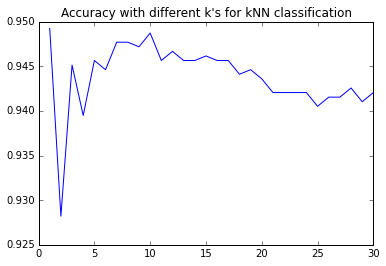

In [16]:
pl.plot(results_df.k, results_df.accuracy)
pl.title("Accuracy with different k's for kNN classification")